## Fokker-Planck Shooter
For convenience the key equations are given below from https://arxiv.org/pdf/astro-ph/9407016.pdf:

1) Fokker-Planck equation
$$    \frac{\partial P(\varphi,t)}{\partial t} = \frac{1}{3H}\frac{\partial}{\partial \varphi}\left(V'(\varphi) P(\varphi,t)\right) + \frac{H^3}{8\pi^2}\frac{\partial^2 P(\varphi,t)}{\partial \varphi^2} $$

2) Schrodinger-like equation
$$     -\frac{1}{2}\frac{\partial^2 \Phi_n(\varphi)}{\partial \varphi^2} + W(\varphi) \Phi_n (\varphi) = \frac{4\pi^2\Lambda_n}{H^3}\Phi_n(\varphi) $$

3) Effective potential
$$ W(\varphi) = \frac{1}{2}\left[v'(\varphi)^2-v''(\varphi)\right], \> \> v(\varphi) = \frac{4\pi^2}{3H^4} V(\varphi) $$

4) Solutions take the form
$$ P(\varphi,t) = \exp\left(-\frac{4\pi^2 V(\varphi)}{3H^4}\right) \sum^{\infty}_{n=0} a_n \Phi_n (\varphi) e^{-\Lambda_n (t-t_0)} $$

In [1]:
import numpy as np
from math import factorial
from scipy.integrate import odeint, simps
from scipy.special import eval_hermite
import matplotlib.pyplot as plt
%matplotlib inline

### Defining key parameters

In [2]:
hubble_rate = 1
mass = 1
mass_squared = mass**2
self_coupling = 0

### Quadratic potential
Here we define a potential 
$$ V(\varphi) = \frac{1}{2} m^2 \varphi^2, $$
with effective potential
$$ W(\varphi) = m^2\frac{2\pi^2}{3H^4}\left[\frac{4\pi^2}{3H^4} m^2 \varphi^2 - 1\right] $$
The eigenvalues have been determined in https://arxiv.org/pdf/1904.11917.pdf for the free limit to be
$$ \Lambda_n = \frac{n}{3}\frac{m^2}{H} $$

In [3]:
# Field 
field = np.linspace(0, 100, 30000)

# Effective potential
def effective_potential(field):
    '''Defines the effective potential in the SL equation
    field: Field value'''
    
    W = mass_squared*((2*np.pi**2)/(3*hubble_rate**4))*(((4*np.pi**2)/(3*hubble_rate**4))*mass_squared*field**2 - 1)
    return W

Below we rewrite the Schrodinger-like equation as a coupled system of ODEs which we then use the ``odeint`` function to integrate.
$$ \frac{\partial \Phi_n(\varphi)}{\partial \varphi} = Y $$
$$     \frac{\partial Y}{\partial \varphi} = 2 W(\varphi) \Phi_n (\varphi) - \frac{8\pi^2\Lambda_n}{H^3}\Phi_n(\varphi) $$

In [4]:
# Schrodinger-like coupled ODEs
def schrodinger_like_ODE(V, field):
    '''Computes the second derivative of the SL equation
    V: array where first entry is the eigenfunction, second is Y
    as defined above
    field: field values'''
    
    # Empty array for derivatives
    dV = np.zeros(2)
    
    # Computes derivatives
    dV[0] = V[1]
    dV[1] = V[0]*(2*effective_potential(field) - (8*eigenvalue*np.pi**2)/(hubble_rate**3))
    return dV

We start with $n=0$ for the eigenvalue. We also create two arrays ``V_even`` and ``V_odd`` which serve as the starting conditions for even and odd $\Phi_n$, respectively.

In [5]:
# Eigenvalue
def quadratic_eigenvalue(n):
    '''Computes the eigenvalue for the quadratic case for a given n
    n: eigenfunction label'''
    
    # Eigenvalue
    q = (n/3)*(mass_squared/hubble_rate)
    return q

eigenvalue = quadratic_eigenvalue(0)

# Starting conditions for the even and odd functions
V_even = np.array([1,0])
V_odd = np.array([0,1])

# Integrates Schrodinger-like equation
V_0 = odeint(schrodinger_like_ODE, V_even, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Now lets change $n$ slightly so we undershoot and overshoot.

In [6]:
# Changing n
eigenvalue = quadratic_eigenvalue(0.1)
# Integrates SL equation
V_0p = odeint(schrodinger_like_ODE, V_even, field)

# Changing n
eigenvalue = quadratic_eigenvalue(-0.1)
# Integrates SL equation
V_0m = odeint(schrodinger_like_ODE, V_even, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


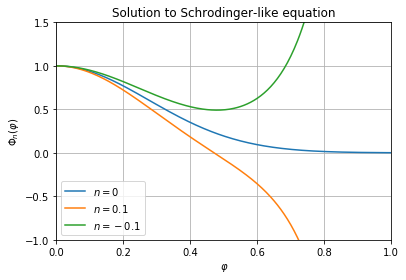

In [7]:
# Plotting
plt.grid()
plt.ylim(-1, 1.5)
plt.xlim(0, 1)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field ,V_0[:,0], label="$n=0$")
plt.plot(field, V_0p[:,0], label="$n=0.1$")
plt.plot(field, V_0m[:,0], label="$n=-0.1$")
plt.legend()

Let us now try the next eigenvalue with $n=1$ and an odd initial condition.

In [8]:
# Changing n
eigenvalue = quadratic_eigenvalue(1)
# Integrates SL equation
V_1 = odeint(schrodinger_like_ODE, V_odd, field)

# Changing n
eigenvalue = quadratic_eigenvalue(1.1)
# Integrates SL equation
V_1p = odeint(schrodinger_like_ODE, V_odd, field)

# Changing n
eigenvalue = quadratic_eigenvalue(0.9)
# Integrates SL equation
V_1m = odeint(schrodinger_like_ODE, V_odd, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


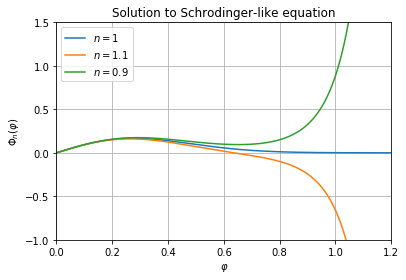

In [9]:
# Plotting
plt.grid()
plt.ylim(-1, 1.5)
plt.xlim(0, 1.2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field, V_1[:,0], label="$n=1$")
plt.plot(field, V_1p[:,0], label="$n=1.1$")
plt.plot(field, V_1m[:,0], label="$n=0.9$")
plt.legend()

Now for $n=2$. 

In [10]:
# Changing n
eigenvalue = quadratic_eigenvalue(2)
# Integrates SL equation
V_2 = odeint(schrodinger_like_ODE, V_even, field)

# Changing n
eigenvalue = quadratic_eigenvalue(2.1)
# Integrates SL equation
V_2p = odeint(schrodinger_like_ODE , V_even, field)

# Changing n
eigenvalue = quadratic_eigenvalue(1.9)
# Integrates SL equation
V_2m = odeint(schrodinger_like_ODE, V_even, field)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


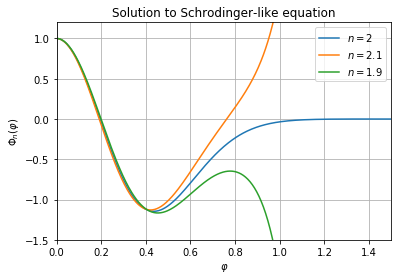

In [11]:
# Plotting
plt.grid()
plt.ylim(-1.5, 1.2)
plt.xlim(0, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field, V_2[:,0], label="$n=2$")
plt.plot(field, V_2p[:,0], label="$n=2.1$")
plt.plot(field, V_2m[:,0], label="$n=1.9$")
plt.legend()

## Normalisation condition
In order to ensure the eigenfunctions are normalised we need ensure their square integral is unity so that
$$ 1 = \int \Phi^*_n \Phi_n d\varphi $$
Since the eigenfunctions we intially consider are even or odd it is straightforward to compute the other half once we integrated the first half. This involves reflecting the field and eigenfunctions. We do this below. 

In [12]:
# Computes the full eigenfunction after integrating half of it
def full_eigenfunction(field, eigenfunction, parity):
    '''Determines the full eigenfunction based on the parity of the eigenfunction.
    Only applies in the case of symmetric potentials.
    field: half of the field values over which we integrated
    eigenfunction: integrated eigenfunction
    parity: variable determining the symmetry of the eigenfunction. 1 indicates
    even, -1 indicates odd'''
    
    # Checks to see if parity is a valid value
    if parity**2 == 1:
        # Determines the full range of field values
        field_reflection = -np.flip(field[1:])
        field = np.append(field_reflection, field)
    
        # Determines full eigenfunction for the full range of field values
        eigenfunction_reflection = parity*np.flip(eigenfunction[1:])
        eigenfunction = np.append(eigenfunction_reflection, eigenfunction)

        return field, eigenfunction

# Determines full eigenfunctions
field_full, V_0 = full_eigenfunction(field[:450], V_0[:450,0], 1)
field_full, V_1 = full_eigenfunction(field[:450], V_1[:450,0], -1)
field_full, V_2 = full_eigenfunction(field[:450], V_2[:450,0], 1)

In [13]:
# Integration interval as defined in the normalisation condition
dphi = field_full[1] - field_full[0]

# Normalisation constants
N_0 = np.sqrt(simps(V_0**2, field_full, dphi))
N_1 = np.sqrt(simps(V_1**2, field_full, dphi))
N_2 = -np.sqrt(simps(V_2**2, field_full, dphi))

# Normalisation
V_0 = V_0/N_0
V_1 = V_1/N_1
V_2 = V_2/N_2

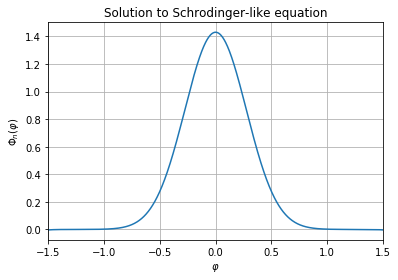

In [14]:
# Plotting 
plt.grid()
plt.xlim(-1.5, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_0)

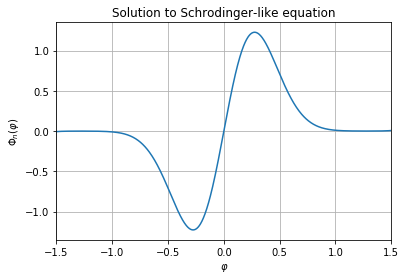

In [15]:
# Plotting
plt.grid()
plt.xlim(-1.5, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_1)

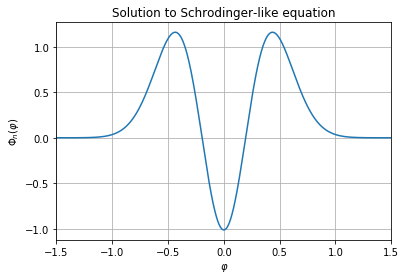

In [16]:
# Plotting
plt.grid()
plt.xlim(-1.5, 1.5)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_2)

## Analytic solutions
The analytic solution for the quadratic potential is given in https://arxiv.org/pdf/1904.11917.pdf. These are analogous to the wavefunction for the harmonic oscillator.
$$ \Phi_n = \frac{\sqrt{m}}{H}\frac{1}{\sqrt{2^n n!}}\left(\frac{4\pi}{3}\right)^{1/4}e^{-\frac{2\pi^2 \tilde{x}^2}{3}}H_n\left(\frac{2\pi\tilde{x}}{\sqrt{3}}\right),$$
where $H_n$ are the Hermite polynomials and 
$$\tilde{x} = \frac{m}{H^2}\varphi. $$

In [17]:
def analytic_solution(n, field):
    '''Determines the analytic solution for the quadratic potential
    n: eigenfunction label
    field: field values'''
    
    # x~ as defined above
    x_tilde = (mass/hubble_rate**2)*field
    
    # Eigenfunction
    phi_n = (np.sqrt(mass)/(hubble_rate*np.sqrt((2**n)*factorial(n))))*((4*np.pi/3)**0.25)*np.exp(-2*((np.pi*x_tilde)**2)/3)*eval_hermite(n, 2*np.pi*x_tilde/np.sqrt(3))
    
    return phi_n


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


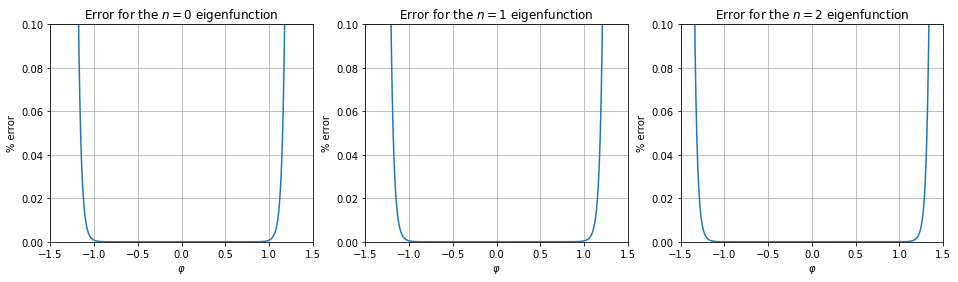

In [18]:
# Analytic solutions for n = 0,1,2
analytic_0 = analytic_solution(0, field_full)
analytic_1 = analytic_solution(1, field_full)
analytic_2 = analytic_solution(2, field_full)

# Calculates errors
error_0 = abs((V_0 - analytic_0)/analytic_0)
error_1 = abs((V_1 - analytic_1)/analytic_1)
error_2 = abs((V_2 - analytic_2)/analytic_2)

# Plotting error
fig = plt.figure(figsize=(16, 4))

# n = 0 eigenfunction
ax0 = fig.add_subplot(1,3,1)
ax0.grid()
ax0.set_title("Error for the $n=0$ eigenfunction")
ax0.set_ylabel("% error")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(-1.5, 1.5)
ax0.set_ylim(0, 0.1)
ax0.plot(field_full, error_0)

# n = 1 eigenfunction
ax1 = fig.add_subplot(1,3,2)
ax1.grid()
ax1.set_title("Error for the $n=1$ eigenfunction")
ax1.set_ylabel("% error")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(0, 0.1)
ax1.plot(field_full, error_1)

# n = 2 eigenfunction
ax2 = fig.add_subplot(1,3,3)
ax2.grid()
ax2.set_title("Error for the $n=2$ eigenfunction")
ax2.set_ylabel("% error")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(0, 0.1)
ax2.plot(field_full, error_2)

## Bisection eigenvalue finder
Here we make use of the interval bisection algorithm to compute eigenvalues numerically. The approach begins by choosing an interval an eigenvalue is believed to lie. If we say that the eigenvalue lies between $\Lambda_a$ and $\Lambda_b$, we consider the solutions at these two eigenvalues and their midpoint $\Lambda_c =(\Lambda_a + \Lambda_b)/2$. For some suitably large field value we determine whether the sign of the eigenfunction is positive or negative for these three points. We narrow down the interval by determining where a change of sign occurs. If say $\Lambda_a$ gave a solution diverging to $-\infty$ while $\Lambda_c$ diverged to $\infty$ then we set these two values to be the new interval and then evaluate the new midpoint. We repeat the process until we reach the desired tolerance. 

In [19]:
# Bisection eigenvalue finder
class bisection_method:
    '''Bisection eigenvalue solver including an ODE method for the
    coupled ODE system for the Schrodinger-like equation discussed
    previously and a bisection loop to find eigenvalues.'''
    
    def __init__(self, interval):
        '''Initialization of eigenvalues where the bracketed eigenvalues
        are assigned as attributes.
        interval: two element array where the first entry is the lower 
        eigenvalue and the second element is the higher eigenvalue'''
        
        # Setting up initial trial eigenvalues
        self.low_eigenvalue = interval[0]
        self.high_eigenvalue = interval[1]
        self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
    
    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
    
        # Empty array for derivatives
        dV = np.zeros(2)
    
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV
    
    def bisection_loop(self, V, field, tolerance, max_iterations):
        '''Implements the bisection method to compute eigenvalues. The
        algorithm is designed to determine which side of the midpoint 
        the sign of the solution changes and then narrow down the interval 
        until suitable tolerance is reached.
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values
        tolerance: determines how close to zero the solutions should reach 
        to be deemed to have converged sufficiently
        max_iterations: caps the number of iterations the loop undergoes
        in the event the tolerance is not reached'''
        
        # Initial low eigenvalue and its solution
        self.eigenvalue = self.high_eigenvalue
        V_high = odeint(self.schrodinger_like_ODE, V, field)
    
        # Initial high eigenvalue and its solution
        self.eigenvalue = self.low_eigenvalue
        V_low = odeint(self.schrodinger_like_ODE, V, field)
    
        # Initial midpoint eigenvalue and its solution
        self.eigenvalue = self.new_eigenvalue
        V_new = odeint(self.schrodinger_like_ODE, V, field)
        
        # Initializing number of iterations
        iterations = 0
        # Loop that runs until we hit the desired tolerance or max_iterations is exceeded
        while abs(V_new[-1,0]) > tolerance:
            # Checks to see which boundary eigenvalue gives positive or negative diverging solutions
            if V_high[-1,0] > V_new[-1,0] > V_low[-1,0]:
                # Checks if the midpoint eigenvalue gives negatively diverging solutions
                if V_new[-1,0] < 0:                    
                    # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                    V_low = V_new
                    self.low_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                # Runs if the midpoint eigenvalue converges to positive infinity
                else:
                    # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                    V_high = V_new
                    self.high_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
            # Runs if the higher eigenvalue gives negative diverging solutions while the lower gives the reverse
            else:
                # Checks if the midpoint eigenvalue gives negatively diverging solutions
                if V_new[-1,0] < 0:
                    # Sets eigenvalue c to be eigenvalue b, likewise for the solutions
                    V_high = V_new
                    self.high_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
                # Runs if the midpoint eigenvalue converges to positive infinity
                else:
                    # Sets eigenvalue c to be eigenvalue a, likewise for the solutions
                    V_low = V_new
                    self.low_eigenvalue = self.new_eigenvalue
                    
                    # Determines the new midpoint eigenvalue and its solutions
                    self.new_eigenvalue = (self.high_eigenvalue + self.low_eigenvalue)/2
                    self.eigenvalue = self.new_eigenvalue
                    V_new = odeint(self.schrodinger_like_ODE, V, field)
            
            # Updates number of iterations
            iterations = iterations + 1
            # If max_iterations is exceeded the loop is stopped
            if iterations > max_iterations:
                break
            
        return self.new_eigenvalue, V_new

In [20]:
# Field 
field = np.linspace(0, 10, 3000)

# Running the bisection algorithm for
bisect = bisection_method([-0.1, 0.2])
eigenvalue_0, V_0 = bisect.bisection_loop(V_even, field, 0.5, 250)

In [21]:
# Running the bisection algorithm
bisect = bisection_method([0.1, 0.5])
eigenvalue_1, V_1 = bisect.bisection_loop(V_odd, field, 0.5, 250)

In [22]:
# Running the bisection algorithm
bisect = bisection_method([0.4, 0.7])
eigenvalue_2, V_2 = bisect.bisection_loop(V_even, field, 0.5, 250)

In [23]:
# Eigenvalues
print(eigenvalue_0, eigenvalue_1, eigenvalue_2)

-1.879774542535865e-09 0.3333333602708025 0.666666676912796


In [24]:
# Determines full eigenfunctions
field_full, V_0 = full_eigenfunction(field[:600], V_0[:600,0], 1)
field_full, V_1 = full_eigenfunction(field[:600], V_1[:600,0], -1)
field_full, V_2 = full_eigenfunction(field[:600], V_2[:600,0], 1)

In [25]:
# Integration interval as defined in the normalisation condition
dphi = field_full[1] - field_full[0]

# Normalisation constants
N_0 = np.sqrt(simps(V_0**2, field_full, dphi))
N_1 = np.sqrt(simps(V_1**2, field_full, dphi))
N_2 = -np.sqrt(simps(V_2**2, field_full, dphi))

# Normalisation
V_0 = V_0/N_0
V_1 = V_1/N_1
V_2 = V_2/N_2

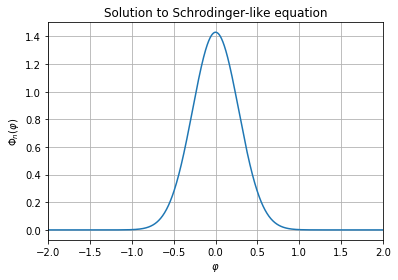

In [26]:
# Plotting 
plt.grid()
plt.xlim(-2, 2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_0)

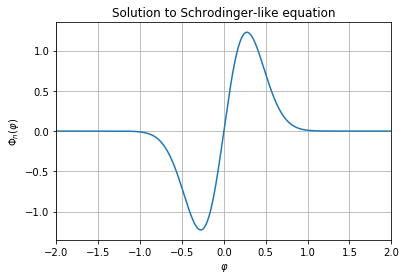

In [27]:
# Plotting
plt.grid()
plt.xlim(-2, 2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_1)

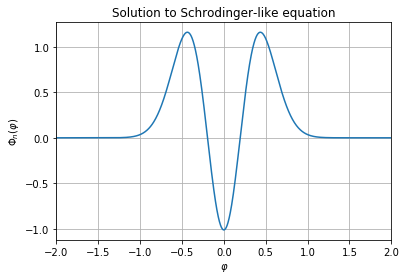

In [28]:
# Plotting
plt.grid()
plt.xlim(-2, 2)
plt.title("Solution to Schrodinger-like equation")
plt.ylabel("$\Phi_n(\\varphi)$")
plt.xlabel("$\\varphi$")
plt.plot(field_full, V_2)

## Comparing the bisection solutions to the analytic result
Here we compute the percentage difference between the analytic results and those obtained through the bisection method. For each case as the error is generally quite small until the field values become large in magnitude. When this happens the analytic solution rapidly approaches zero and the error jumps to large large values.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


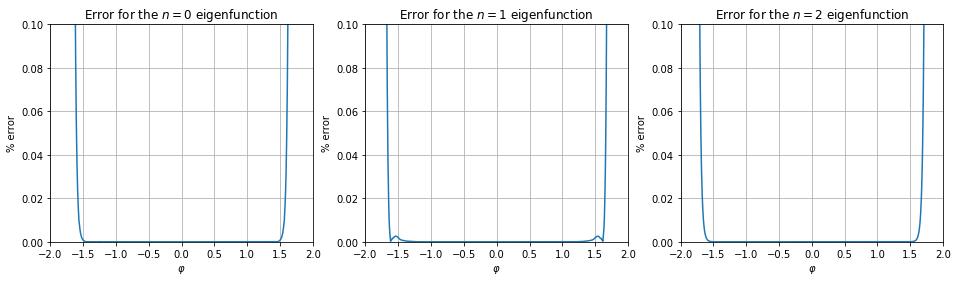

In [29]:
# Analytic solutions for n = 0,1,2
analytic_0 = analytic_solution(0, field_full)
analytic_1 = analytic_solution(1, field_full)
analytic_2 = analytic_solution(2, field_full)

# Calculates errors
error_0 = abs((V_0 - analytic_0)/analytic_0)
error_1 = abs((V_1 - analytic_1)/analytic_1)
error_2 = abs((V_2 - analytic_2)/analytic_2)

# Plotting error
fig = plt.figure(figsize=(16, 4))

# n = 0 eigenfunction
ax0 = fig.add_subplot(1,3,1)
ax0.grid()
ax0.set_title("Error for the $n=0$ eigenfunction")
ax0.set_ylabel("% error")
ax0.set_xlabel("$\\varphi$")
ax0.set_xlim(-2, 2)
ax0.set_ylim(0, 0.1)
ax0.plot(field_full, error_0)

# n = 1 eigenfunction
ax1 = fig.add_subplot(1,3,2)
ax1.grid()
ax1.set_title("Error for the $n=1$ eigenfunction")
ax1.set_ylabel("% error")
ax1.set_xlabel("$\\varphi$")
ax1.set_xlim(-2, 2)
ax1.set_ylim(0, 0.1)
ax1.plot(field_full, error_1)

# n = 2 eigenfunction
ax2 = fig.add_subplot(1,3,3)
ax2.grid()
ax2.set_title("Error for the $n=2$ eigenfunction")
ax2.set_ylabel("% error")
ax2.set_xlabel("$\\varphi$")
ax2.set_xlim(-2, 2)
ax2.set_ylim(0, 0.1)
ax2.plot(field_full, error_2)

## Newton-Raphson
As the bisection method converges rather slowly, it is desirable, if possible to consider other approaches. 
$$\Lambda_{n+1} = \Lambda_{n} - \frac{\Phi_n(\Lambda_n)}{\Phi'_n(\Lambda_n)}, $$ 
with the prime denoting a derivative with respect to the eigenvalue. 